In [1]:
from tabula.io import read_pdf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#Make plots wider for longer timeseries
plt.rcParams["figure.figsize"] = (25,10)

In [3]:
#Source: CA Secretary of State: https://elections.cdn.sos.ca.gov//ballot-measures/pdf/initiative-totals-summary-year.pdf
#Read in .pdf from local directory - also possible to use URL
df = read_pdf("initiative-totals-summary-year.pdf", output_format='dataframe', pages='1-3', lattice=True)

In [4]:
#Rename columns and check resulting dataframe
df[0].columns = ['Year', 'Titled', 'Qualified','Approved','Rejected',
                                             'Failed','Withdrawn']
df[0]

,Year,Titled,Qualified,Approved,Rejected,Failed,Withdrawn
0,Summary Year,Titled,Qualified/\rEligible 1,Approved,Rejected,Failed,Withdrawn
1,1912,5,4,1,3,1,0
2,1913,5,4,2,2,1,0
3,1914,21,12,3,9,9,0
4,1915,2,2,0,2,0,0
...,...,...,...,...,...,...,...
105,4 One initiative that qualified for the March ...,NaN,NaN,NaN,NaN,NaN,NaN
106,5 One initiative that qualified for the Novemb...,NaN,NaN,NaN,NaN,NaN,NaN
107,6 Two initiatives are eligible for the Novembe...,NaN,NaN,NaN,NaN,NaN,NaN
108,7 Two initiatives are eligible for the Novembe...,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Tabula outputs a list of dfs found as tables in the .pdf, and our data is in df[0]. However, each page's 
#heading and all footnotes have been added as records.
df[0].tail(10)

,Year,Titled,Qualified,Approved,Rejected,Failed,Withdrawn
100,2023,5,0,0,0,0,0
101,TOTAL 8,"2,117",400,138,254,"1,575",137
102,1 Initiatives become eligible for the ballot o...,NaN,NaN,NaN,NaN,NaN,NaN
103,2 One indirect initiative was adopted by the L...,NaN,NaN,NaN,NaN,NaN,NaN
104,3 Two initiatives that qualified for the 1984 ...,NaN,NaN,NaN,NaN,NaN,NaN
105,4 One initiative that qualified for the March ...,NaN,NaN,NaN,NaN,NaN,NaN
106,5 One initiative that qualified for the Novemb...,NaN,NaN,NaN,NaN,NaN,NaN
107,6 Two initiatives are eligible for the Novembe...,NaN,NaN,NaN,NaN,NaN,NaN
108,7 Two initiatives are eligible for the Novembe...,NaN,NaN,NaN,NaN,NaN,NaN
109,"8 Of the 138 approved initiatives, 137 were ap...",NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df[0].loc[df[0]['Titled']=='Titled']

,Year,Titled,Qualified,Approved,Rejected,Failed,Withdrawn
0,Summary Year,Titled,Qualified/\rEligible 1,Approved,Rejected,Failed,Withdrawn
47,Summary Year,Titled,Qualified/\rEligible 1,Approved,Rejected,Failed,Withdrawn
96,Summary Year,Titled,Qualified/\rEligible 1,Approved,Rejected,Failed,Withdrawn


In [5]:
#We delete both
Ballot_Results = df[0].drop(list(range(101,110))+[0,47,96])

#Footnotes in the orignal year column confuse a conversion to numeric data type, so we strip 
#any more than 4 characters in the year column
Ballot_Results['Year'] = Ballot_Results['Year'].str[:4]

#Check resulting DataFrame
Ballot_Results

,Year,Titled,Qualified,Approved,Rejected,Failed,Withdrawn
1,1912,5,4,1,3,1,0
2,1913,5,4,2,2,1,0
3,1914,21,12,3,9,9,0
4,1915,2,2,0,2,0,0
5,1916,3,2,1,1,1,0
...,...,...,...,...,...,...,...
95,2019,20,5,2,3,13,2
97,2020,11,2,1,1,8,1
98,2021,35,4,0,2,29,2
99,2022,9,4,1,1,4,1


In [8]:
#Convert all columns to int data type
cols = Ballot_Results.columns 
Ballot_Results[cols]= Ballot_Results[cols].astype(int)

In [9]:
Ballot_Results.describe()

,Year,Titled,Qualified,Approved,Rejected,Failed,Withdrawn
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,1971.040816,21.591837,4.071429,1.408163,2.581633,16.071429,1.397959
std,32.967312,20.962331,3.140195,1.449043,2.134273,17.766672,2.358314
min,1912.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1942.500000,5.250000,1.250000,0.000000,1.000000,2.000000,0.000000
50%,1974.500000,15.000000,3.500000,1.000000,2.000000,9.000000,0.000000
75%,1998.750000,34.750000,6.000000,2.000000,4.000000,25.750000,2.000000
max,2023.000000,109.000000,12.000000,6.000000,9.000000,97.000000,11.000000


In [10]:
Ballot_Results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, 1 to 100
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Year       98 non-null     int64
 1   Titled     98 non-null     int64
 2   Qualified  98 non-null     int64
 3   Approved   98 non-null     int64
 4   Rejected   98 non-null     int64
 5   Failed     98 non-null     int64
 6   Withdrawn  98 non-null     int64
dtypes: int64(7)
memory usage: 6.1 KB


In [6]:
Ballot_Results.to_csv('Aggregate_Annual_Ballot_Results.csv')

<Axes: xlabel='Year'>

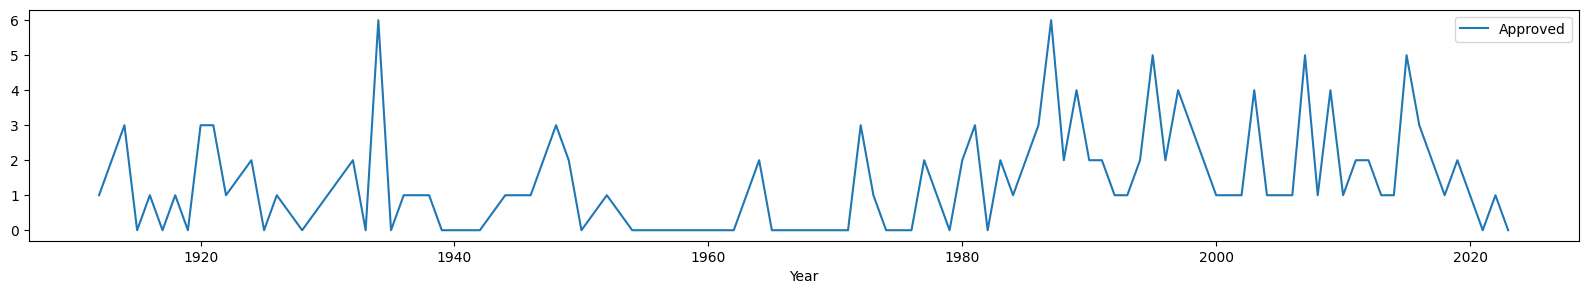

In [69]:
#Looks like modern era (after 1970 or so) has more cyclical activity
Ballot_Results.plot(x='Year', y='Approved')

<Axes: xlabel='Year'>

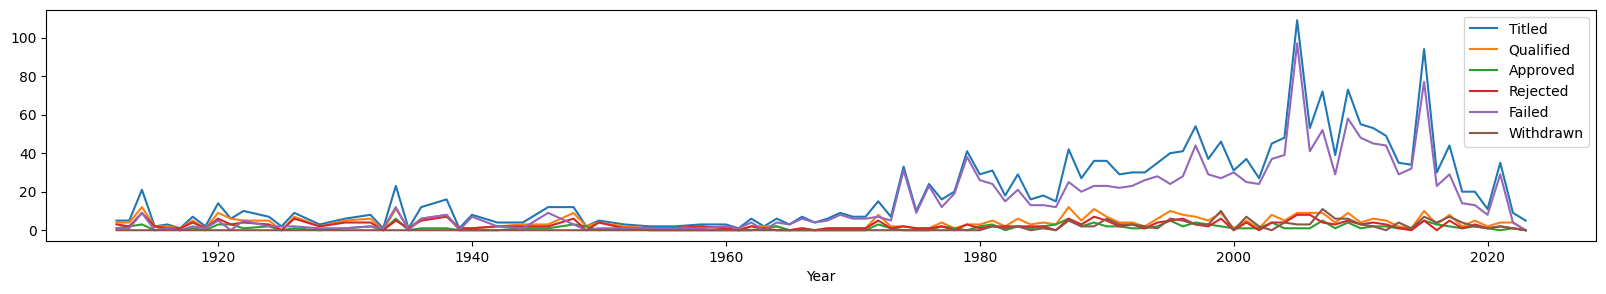

In [70]:
#While many more potential ballot measures have been titled, most seem to have failed before qualifiying to 
#be on the ballot. 2000-2020 was an especially popular period for titling ballot measures
Ballot_Results.plot(x='Year')

<Axes: xlabel='Year'>

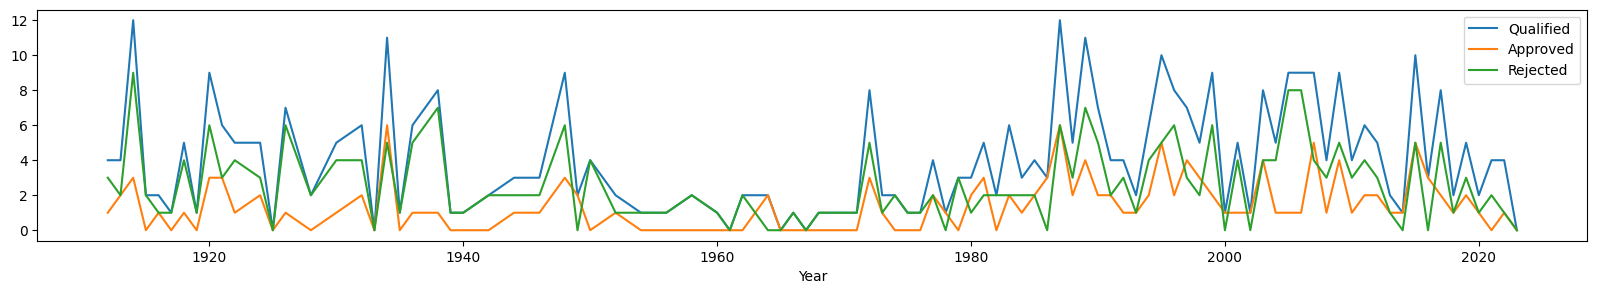

In [71]:
#Historically, the number ballot measures that are qualified and appear on the ballot is more stable, with a 
#noticeable lull in between 1950 and 1970 or so.
Ballot_Results.plot(x='Year',y=['Qualified','Approved','Rejected'])

In [11]:
Modern_Results = Ballot_Results.loc[(Ballot_Results['Year'] >= 1972) & (Ballot_Results['Year'] <2023)]

<Axes: xlabel='Year'>

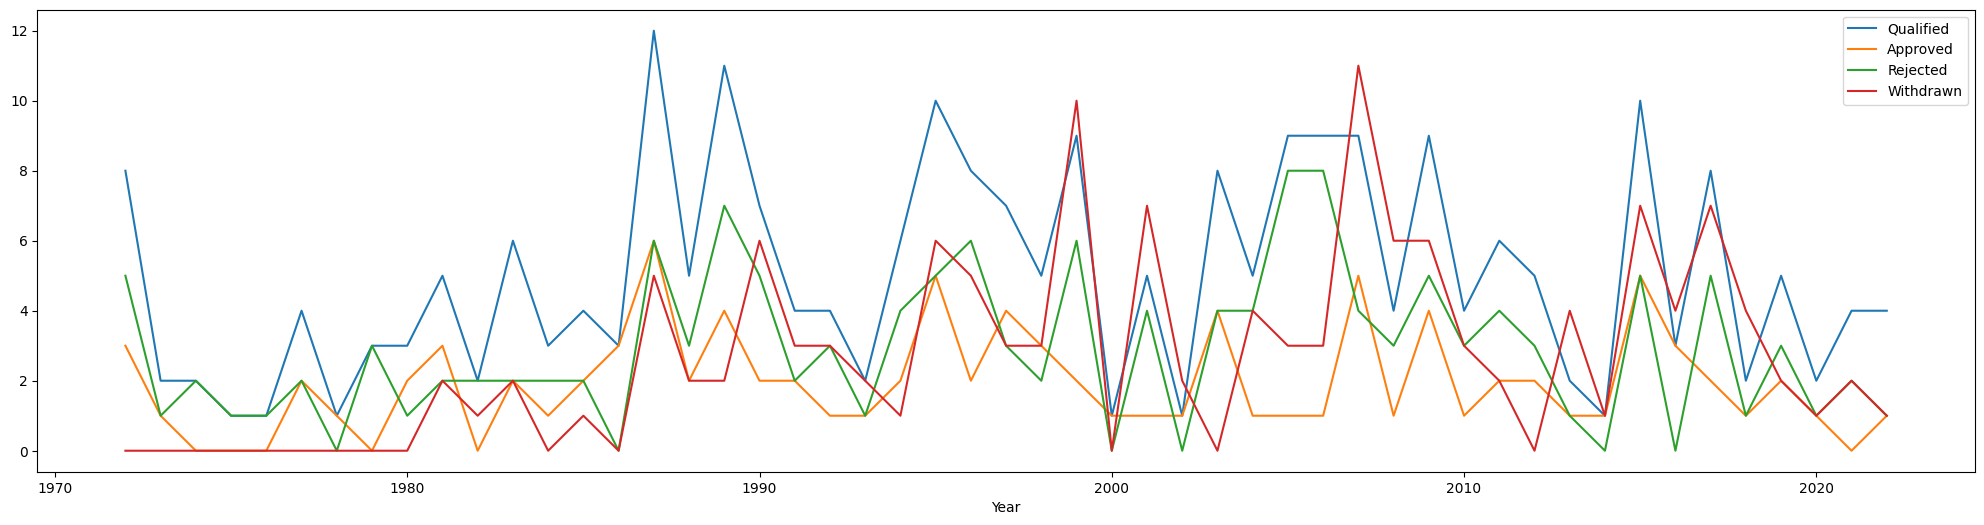

In [53]:
Modern_Results.plot(x='Year',y=['Qualified','Approved','Rejected','Withdrawn'])

<Axes: xlabel='Year'>

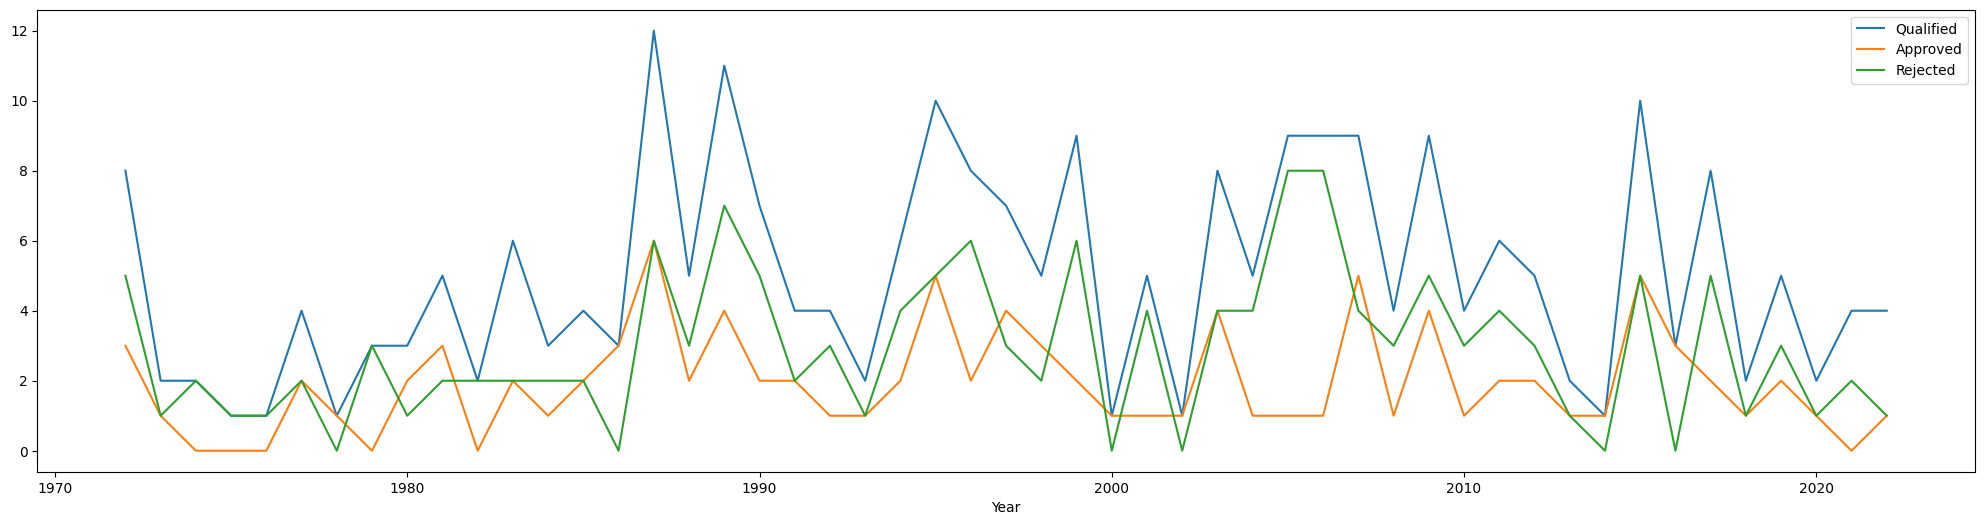

In [54]:
Modern_Results.plot(x='Year',y=['Qualified','Approved','Rejected'])

Text(0.5, 0, 'Year')

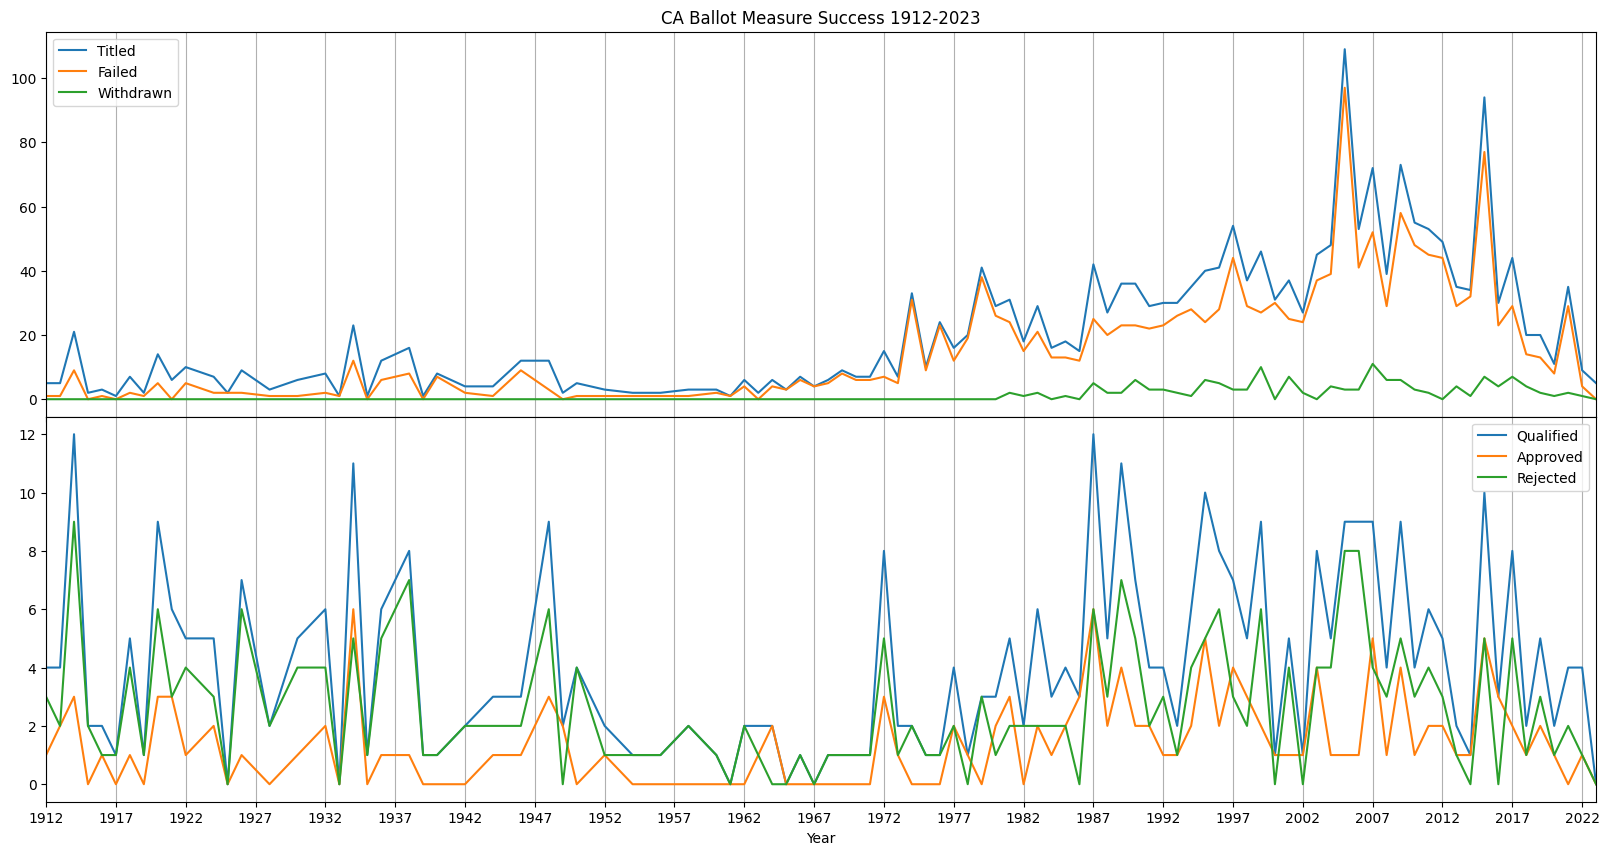

In [167]:
fig1,axes = plt.subplots(2,1, sharex=True)

plt.subplots_adjust(wspace=0,hspace=0)
plt.grid(which='major', axis='x')

axes[0].plot(Ballot_Results['Year'],Ballot_Results[['Titled','Failed','Withdrawn']])
axes[0].legend(['Titled','Failed','Withdrawn'])
axes[0].grid(which='major', axis='x')
axes[0].set_title('CA Ballot Measure Success 1912-2023')

axes[1].plot(Ballot_Results['Year'],Ballot_Results[['Qualified','Approved','Rejected']])
axes[1].legend(['Qualified','Approved','Rejected'])
axes[1].set_xticks(list(range(1912,2023,5)))
axes[1].set_xlim(1912,2023)
axes[1].set_xlabel('Year')


Text(0, 0.5, 'Total Number Qualified')

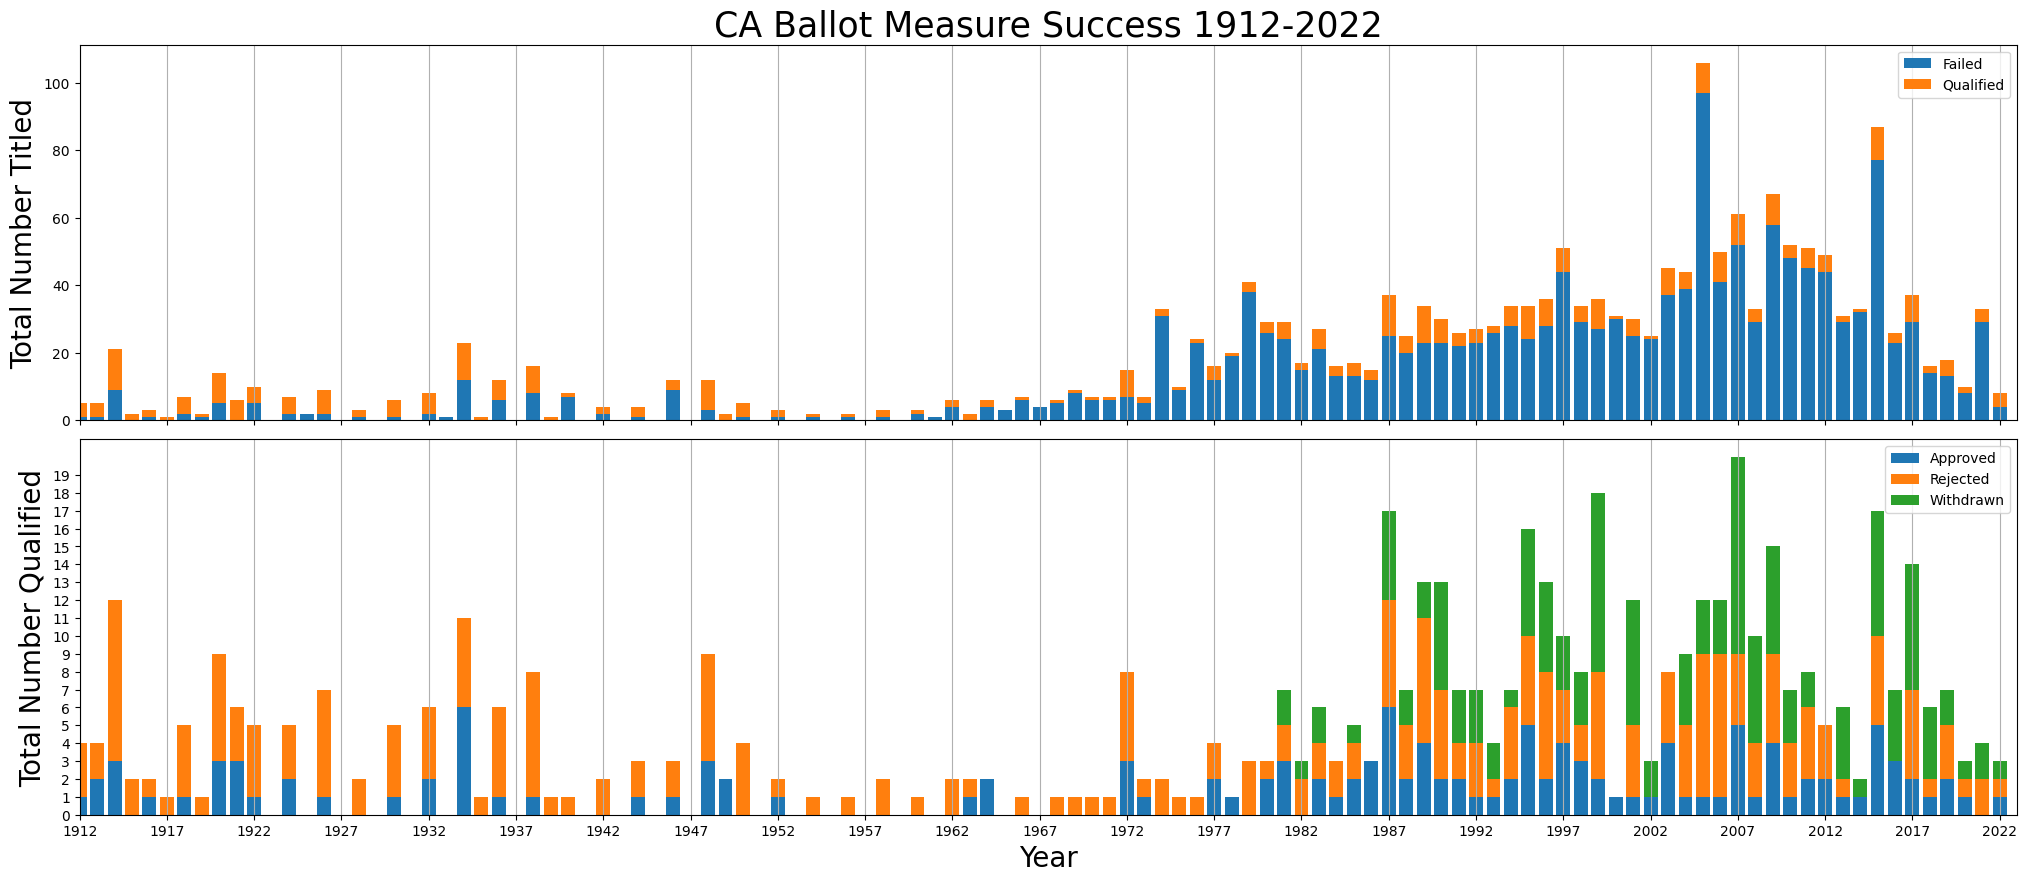

In [17]:
fig2,axes2 = plt.subplots(2,1, sharex=True)

plt.subplots_adjust(wspace=0,hspace=.05)
plt.grid(which='major', axis='x')

#Number of measures qualified + number failed = total number titled
axes2[0].bar(Ballot_Results['Year'],Ballot_Results['Failed'])
axes2[0].bar(Ballot_Results['Year'],Ballot_Results['Qualified'],bottom=Ballot_Results['Failed'])
#axes2[0].bar(Ballot_Results['Year'],Ballot_Results['Withdrawn'],bottom=np.add(Ballot_Results['Titled'],
#                                                                             Ballot_Results['Failed']))
axes2[0].legend(['Failed','Qualified'])
axes2[0].grid(which='major', axis='x')
axes2[0].set_ylabel('Total Number Titled',size=20)
axes2[0].set_title('CA Ballot Measure Success 1912-2022',size=25)

#Number of measures approved + number rejected + num withdrawn = total number qualified
axes2[1].bar(Ballot_Results['Year'],Ballot_Results['Approved'])
axes2[1].bar(Ballot_Results['Year'],Ballot_Results['Rejected'], bottom=Ballot_Results['Approved'])
axes2[1].bar(Ballot_Results['Year'],Ballot_Results['Withdrawn'],bottom=np.add(Ballot_Results['Rejected'],
                                                                            Ballot_Results['Approved']))
axes2[1].legend(['Approved','Rejected','Withdrawn'])
axes2[1].set_xticks(list(range(1912,2023,5)))
axes2[1].set_xlim(1912,2023)
axes2[1].set_yticks(list(range(0,20,1)))
axes2[1].set_xlabel('Year',size=20)
axes2[1].set_ylabel('Total Number Qualified',size=20)

<Axes: title={'center': 'CA Ballot Measure Success 1972-2022'}, xlabel='Year', ylabel='Total Number Qualified'>

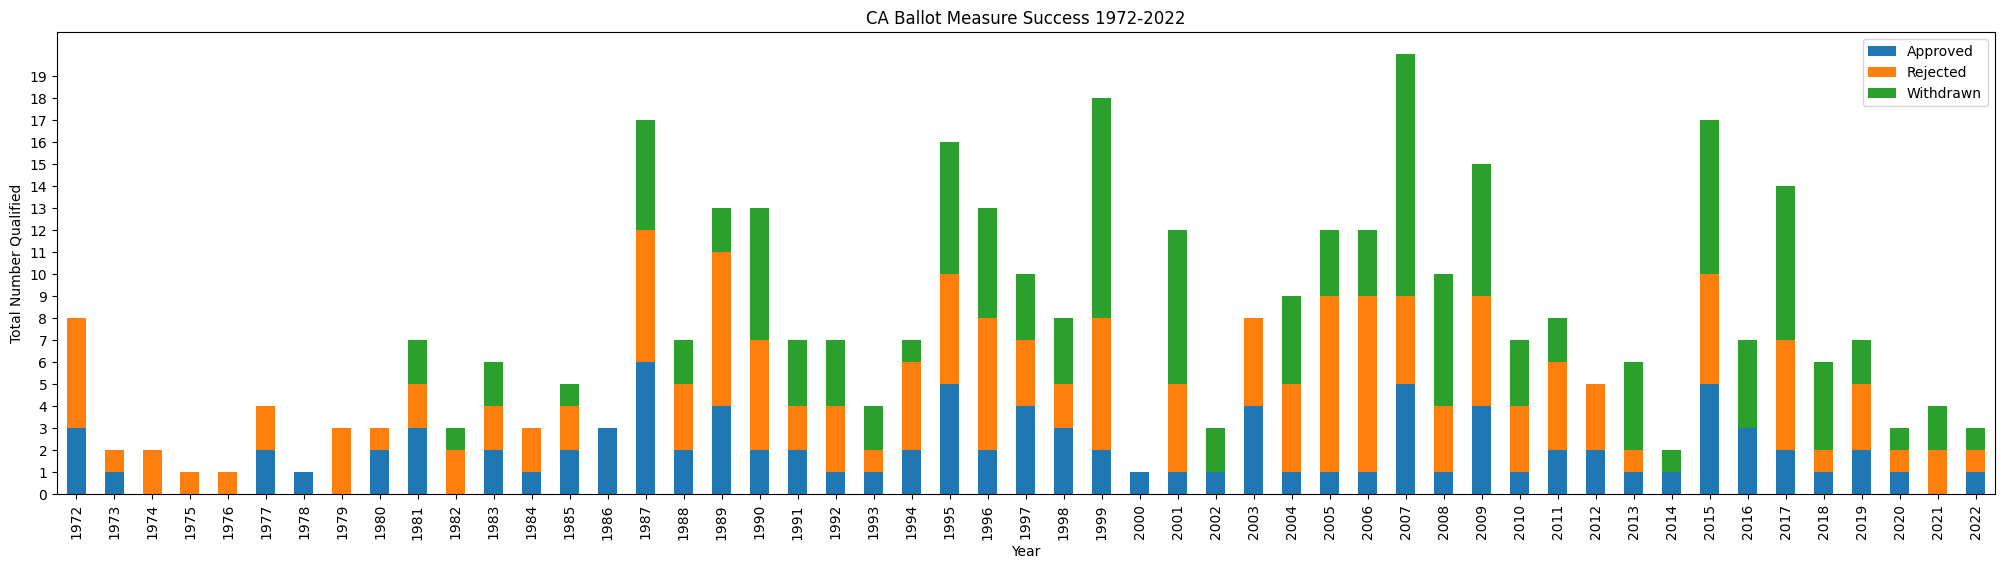

In [86]:
Modern_Results.plot(x='Year',y=['Approved','Rejected','Withdrawn'],kind='bar',stacked=True, 
                    title='CA Ballot Measure Success 1972-2022',ylabel='Total Number Qualified', yticks=
                   range(0,20,1))

In [223]:
#Read in larger dataset for next phase - need to collect money spent for and against, polling and vote results.
#Contributions will need to be adjusted for inflation. Also not clear if there are major events to explain
#some years with many more or fewer things on the ballot.
df3 = read_pdf("https://elections.cdn.sos.ca.gov/ballot-measures/pdf/initiatives-by-title-and-summary-year.pdf", 
               output_format='dataframe', pages='all',lattice=True)

In [224]:
df3[0].drop(['Unnamed: 2'],axis=1,inplace=True)
df3[0].drop([3662,3664,3666,3668,3670],inplace=True)
df3[0].dropna(how='all',inplace=True)
df3[0].columns = ['Year','InitNumber', 'Title', 'Qualified/Failed','PropNum','Appoved/Rejected','ElectionYear']
df3[0].drop(df3[0].loc[df3[0]['Year']=='YEAR'].index, inplace=True)

df3[0]

,Year,InitNumber,Title,Qualified/Failed,PropNum,Appoved/Rejected,ElectionYear
4,1912,NaN,Abolition of Death Penalty,F,NaN,NaN,NaN
5,1912,NaN,Formation of Consolidated City and County Gove...,Q,NaN,R,1912
6,1912,NaN,Prohibit Bookmaking and Appointment of Racing ...,Q,NaN,R,1912
7,1912,NaN,Relating to Taxation by Counties-Cities (CA),Q,NaN,R,1912
8,1912,NaN,Abolition of the Poll Tax (CA),Q,10,A,1914
...,...,...,...,...,...,...,...
3657,2023,1941,Pending,NaN,NaN,NaN,NaN
3658,2023,1942,Pending,NaN,NaN,NaN,NaN
3659,2023,1943,Pending,NaN,NaN,NaN,NaN
3660,2023,1944,Pending,NaN,NaN,NaN,NaN


In [227]:
df3[0].describe()

,Year,InitNumber,Title,Qualified/Failed,PropNum,Appoved/Rejected,ElectionYear
count,2626,1852,2117,1332,391,399,242
unique,104,1851,1033,107,97,29,56
top,2005,394,F,F,R,R,1914
freq,109,2,696,879,93,161,17


In [228]:
df3[0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2628 entries, 4 to 3661
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              2626 non-null   object
 1   InitNumber        1852 non-null   object
 2   Title             2117 non-null   object
 3   Qualified/Failed  1332 non-null   object
 4   PropNum           391 non-null    object
 5   Appoved/Rejected  399 non-null    object
 6   ElectionYear      242 non-null    object
dtypes: object(7)
memory usage: 164.2+ KB


In [226]:
Full_Ballot_Measure_Data = df3[0]
Full_Ballot_Measure_Data.to_csv('Full_Ballot_Measure_Data.csv')

In [18]:
Modern_Ballot_Results = pd.read_csv('Aggregate_Annual_Ballot_Results.csv',index_col=0)
Modern_Ballot_Results

,Year,Titled,Qualified,Approved,Rejected,Failed,Withdrawn
1,1912,5,4,1,3,1,0
2,1913,5,4,2,2,1,0
3,1914,21,12,3,9,9,0
4,1915,2,2,0,2,0,0
5,1916,3,2,1,1,1,0
...,...,...,...,...,...,...,...
95,2019,20,5,2,3,13,2
97,2020,11,2,1,1,8,1
98,2021,35,4,0,2,29,2
99,2022,9,4,1,1,4,1


In [19]:
Annual_Success_Rate = Modern_Ballot_Results.groupby('Year', as_index=False).sum()

In [20]:
#Calculate the proportion of ballot measures that qualify for the ballot that are approved by voters
Annual_Success_Rate['Qualified_Approval_Rate'] = Annual_Success_Rate['Approved']/Annual_Success_Rate['Qualified']

#Calculate proportion of ballot measures that receive title and summary that qualify for the ballot
Annual_Success_Rate['Titled_Qualification_Rate'] = Annual_Success_Rate['Qualified']/Annual_Success_Rate['Titled']

Annual_Success_Rate

,Year,Titled,Qualified,Approved,Rejected,Failed,Withdrawn,Qualified_Approval_Rate,Titled_Qualification_Rate
0,1912,5,4,1,3,1,0,0.25,0.800000
1,1913,5,4,2,2,1,0,0.50,0.800000
2,1914,21,12,3,9,9,0,0.25,0.571429
3,1915,2,2,0,2,0,0,0.00,1.000000
4,1916,3,2,1,1,1,0,0.50,0.666667
...,...,...,...,...,...,...,...,...,...
93,2019,20,5,2,3,13,2,0.40,0.250000
94,2020,11,2,1,1,8,1,0.50,0.181818
95,2021,35,4,0,2,29,2,0.00,0.114286
96,2022,9,4,1,1,4,1,0.25,0.444444


In [68]:
Annual_Success_Rate.describe()

,Year,Titled,Qualified,Approved,Rejected,Failed,Withdrawn,Qualified_Approval_Rate,Titled_Qualification_Rate
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,92.000000,98.000000
mean,1971.040816,21.591837,4.071429,1.408163,2.581633,16.071429,1.397959,0.325944,0.332101
std,32.967312,20.962331,3.140195,1.449043,2.134273,17.766672,2.358314,0.289049,0.301732
min,1912.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1942.500000,5.250000,1.250000,0.000000,1.000000,2.000000,0.000000,0.000000,0.107565
50%,1974.500000,15.000000,3.500000,1.000000,2.000000,9.000000,0.000000,0.333333,0.190972
75%,1998.750000,34.750000,6.000000,2.000000,4.000000,25.750000,2.000000,0.500000,0.500000
max,2023.000000,109.000000,12.000000,6.000000,9.000000,97.000000,11.000000,1.000000,1.000000


In [35]:
Annual_Success_Rate['Success_Rate'].unique()

array([0.25      , 0.5       , 0.        , 0.2       , 0.33333333,
       0.4       ,        nan, 0.14285714, 0.54545455, 0.16666667,
       0.125     , 1.        , 0.375     , 0.66666667, 0.6       ,
       0.36363636, 0.28571429, 0.57142857, 0.22222222, 0.11111111,
       0.55555556, 0.44444444])

<Axes: title={'center': 'Titled Measure Qualification vs. Qualified Measure Voter Approval Rates'}, xlabel='Year'>

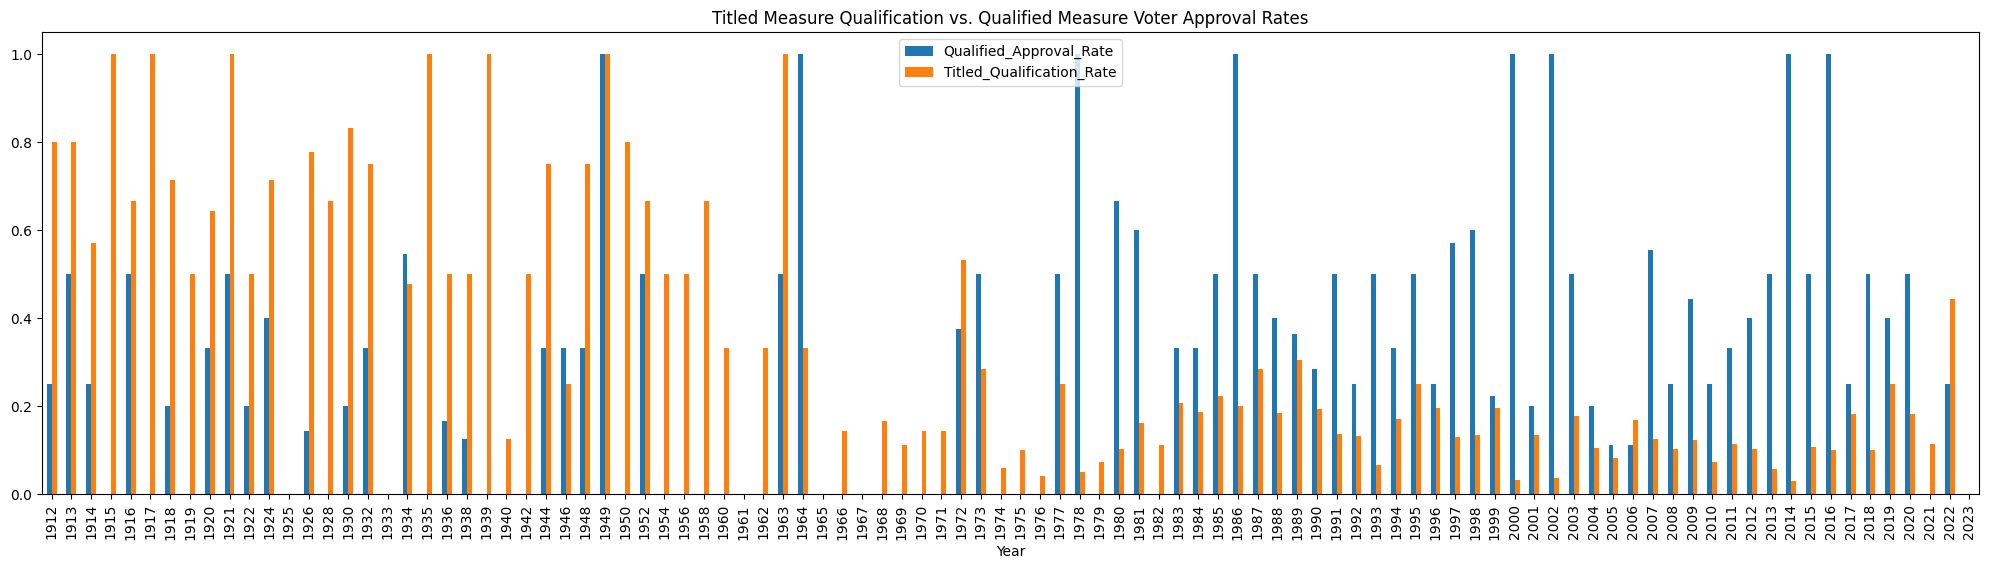

In [41]:
#An inflexion occurs in the 1960 and 70s, as more potential ballot measures receive title and summary, yet fewer
#qualify for the ballot. We could hypothesize that the relatively stable success rates for measures that qualify
#and appear on the ballot encouraged more groups to research measures and seek title and summary. However, perhaps
#due to the steadily rising number (and associated cost) of signatures required qualify (see: 
#https://ballotpedia.org/Signature_requirements_for_ballot_measures_in_California), it is more difficult and 
#expensive to place a measure on the ballot.

Annual_Success_Rate.plot(x='Year', y=['Qualified_Approval_Rate','Titled_Qualification_Rate'],kind='bar',
                        title='Titled Measure Qualification vs. Qualified Measure Voter Approval Rates')

In [23]:
Modern_Success = Annual_Success_Rate[Annual_Success_Rate['Year']>=1972]
Past_Success = Annual_Success_Rate[Annual_Success_Rate['Year']<1972]

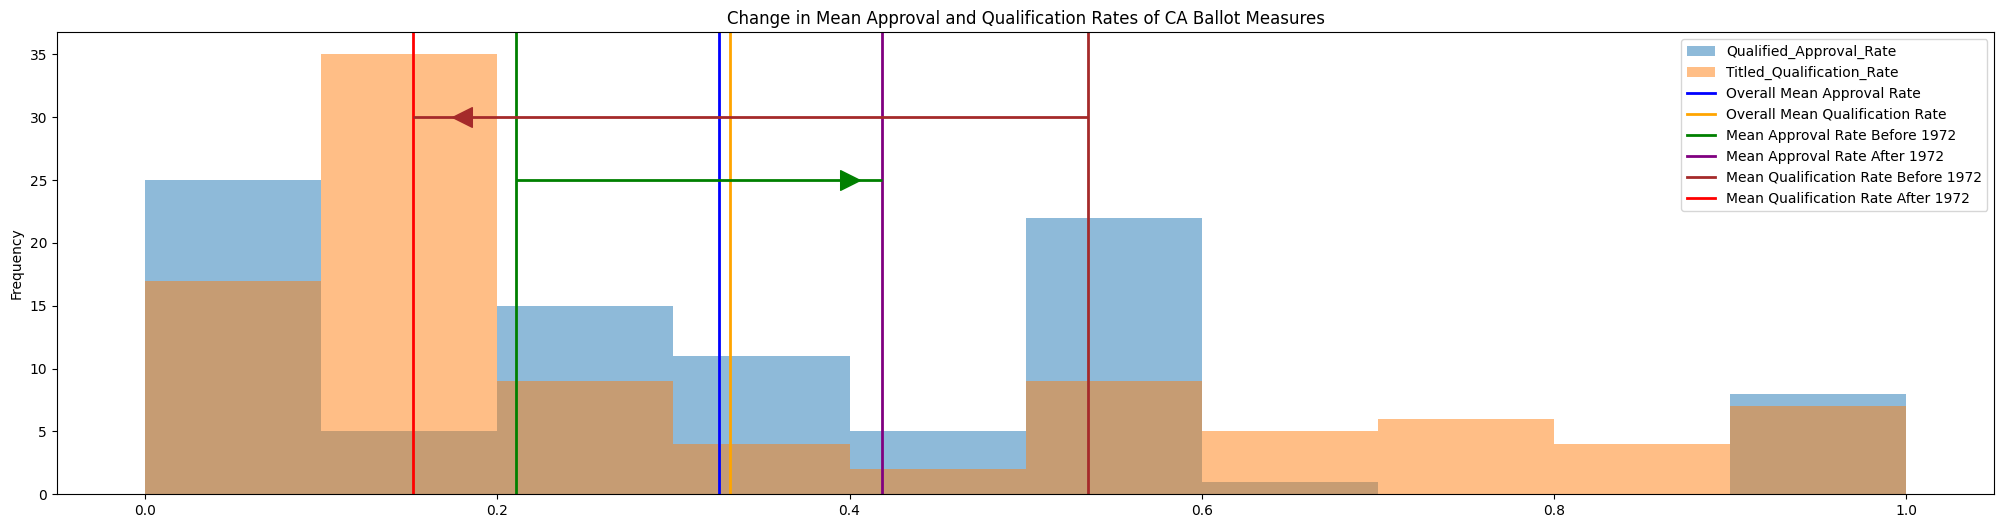

In [111]:
#The means look similar because the two different time periods are cancelling eachother out
#When we compare the means from before 1972 and after, this is very clear. 
ax = Annual_Success_Rate[['Qualified_Approval_Rate','Titled_Qualification_Rate']].plot.hist(alpha=0.5)

ax.axvline(x=np.nanmean(Annual_Success_Rate['Qualified_Approval_Rate']),color='blue',
           label='Overall Mean Approval Rate',linewidth=2)
ax.axvline(x=np.nanmean(Annual_Success_Rate['Titled_Qualification_Rate']),color='orange',
          label='Overall Mean Qualification Rate',linewidth=2)

ax.axvline(x=np.nanmean(Past_Success['Qualified_Approval_Rate']),color='green',
          label='Mean Approval Rate Before 1972',linewidth=2)
ax.axvline(x=np.nanmean(Modern_Success['Qualified_Approval_Rate']),color='purple',
          label='Mean Approval Rate After 1972',linewidth=2)
ax.hlines(y=25, xmin=np.nanmean(Past_Success['Qualified_Approval_Rate']), 
                                xmax=np.nanmean(Modern_Success['Qualified_Approval_Rate']),
                                                linewidth=2, color='green')

ax.axvline(x=np.nanmean(Past_Success['Titled_Qualification_Rate']),color='brown',
          label='Mean Qualification Rate Before 1972',linewidth=2)
ax.axvline(x=np.nanmean(Modern_Success['Titled_Qualification_Rate']),color='red',
          label='Mean Qualification Rate After 1972',linewidth=2)
ax.hlines(y=30, xmin=np.nanmean(Past_Success['Titled_Qualification_Rate']), 
                                xmax=np.nanmean(Modern_Success['Titled_Qualification_Rate']),
                                                linewidth=2, color='brown')

ax.scatter(x=.4, y=25, marker=">",color='green', s=200)
ax.scatter(x=.18, y=30, marker="<",color='brown', s=200)

ax.set_title('Change in Mean Approval and Qualification Rates of CA Ballot Measures')

ax.legend()

In [113]:
#The Qualified Approval rate 1912-1972 was about 21%, nearly doubling to 41.8% from 1972 to 2022.
#The Titled Qualification rate decreased from 53% to 15%. It has become more difficult to qualify, however, 
#success has become more likely once qualified. 

Modern_Success.describe()

,Year,Titled,Qualified,Approved,Rejected,Failed,Withdrawn,Qualified_Approval_Rate,Titled_Qualification_Rate
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,51.000000,52.000000
mean,1997.500000,35.250000,4.884615,1.884615,2.846154,27.634615,2.634615,0.418436,0.152224
std,15.154757,20.204712,3.046398,1.463997,2.127178,17.382692,2.693703,0.278411,0.098841
min,1972.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1984.750000,20.000000,2.000000,1.000000,1.000000,18.000000,0.000000,0.250000,0.100000
50%,1997.500000,33.500000,4.000000,2.000000,2.500000,25.000000,2.000000,0.400000,0.131481
75%,2010.250000,42.500000,7.250000,2.250000,4.000000,31.250000,4.000000,0.500000,0.194614
max,2023.000000,109.000000,12.000000,6.000000,8.000000,97.000000,11.000000,1.000000,0.533333


In [114]:
Past_Success.describe()

,Year,Titled,Qualified,Approved,Rejected,Failed,Withdrawn,Qualified_Approval_Rate,Titled_Qualification_Rate
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.0,41.000000,46.000000
mean,1941.130435,6.152174,3.152174,0.869565,2.282609,3.000000,0.0,0.210894,0.535440
std,18.946250,5.028662,3.018222,1.240227,2.125643,2.966479,0.0,0.262124,0.324838
min,1912.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1924.250000,2.250000,1.000000,0.000000,1.000000,1.000000,0.0,0.000000,0.270833
50%,1939.500000,5.000000,2.000000,0.000000,1.500000,2.000000,0.0,0.142857,0.535714
75%,1959.500000,7.750000,5.000000,1.000000,3.750000,5.000000,0.0,0.333333,0.770833
max,1971.000000,23.000000,12.000000,6.000000,9.000000,12.000000,0.0,1.000000,1.000000


<Axes: ylabel='Density'>

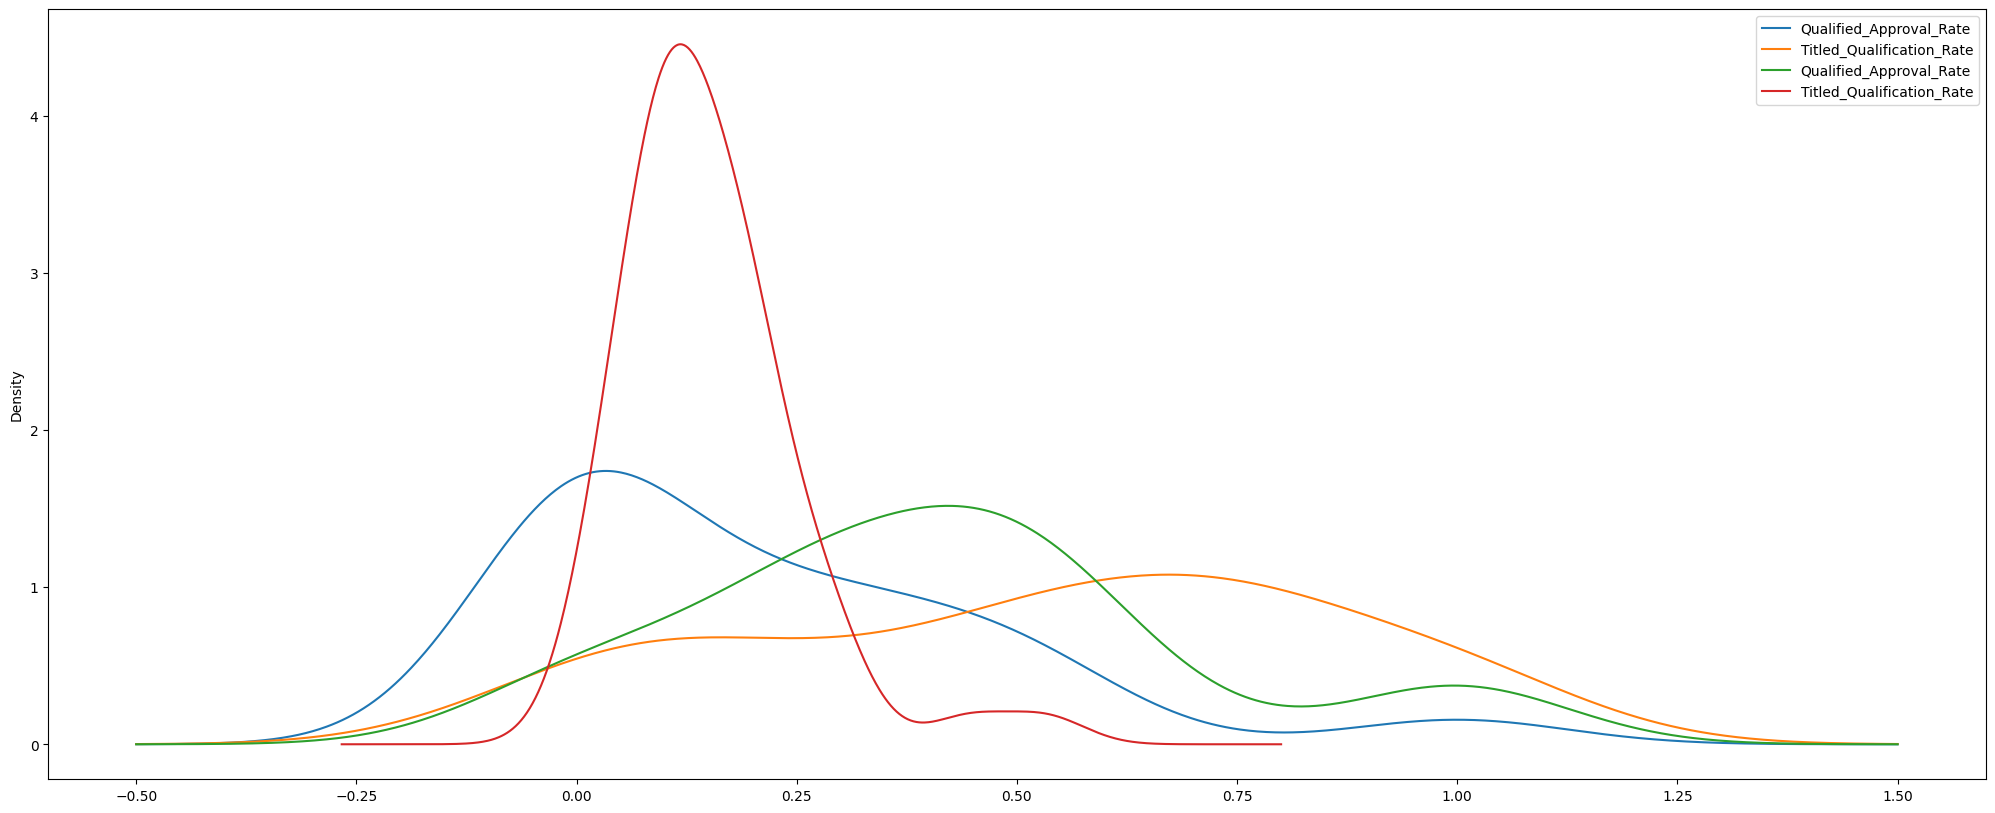

In [51]:
ax4 = Past_Success[['Qualified_Approval_Rate','Titled_Qualification_Rate']].plot(kind='density')
Modern_Success[['Qualified_Approval_Rate','Titled_Qualification_Rate']].plot(ax=ax4,kind='density')

In [43]:
list(range(1,46,1))

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45]